In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import argparse
import cv2
import os

Using TensorFlow backend.


In [0]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [4]:
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


# define the architecture of the network
model1 = Sequential()
model1.add(Dense(768, input_dim=3072, init="uniform",
	activation="relu"))
model1.add(Dense(384, activation="relu", kernel_initializer="uniform"))
model1.add(Dense(2))
model1.add(Activation("softmax"))

with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainData.pkl', 'rb') as f:
    trainData1 = pickle.load(f)
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testData.pkl', 'rb') as f:
     testData1 = pickle.load(f)
    
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/trainLabels.pkl', 'rb') as f:
     trainLabels1 = pickle.load(f)
    
with open('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/testLabels.pkl', 'rb') as f:
     testLabels1 = pickle.load(f)
    
# train the model using SGD
print("[INFO] compiling model...")
sgd = SGD(lr=0.01)
model1.compile(loss="binary_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
model1.fit(trainData1, trainLabels1, epochs=100, batch_size=128,
	verbose=1)



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(768, input_dim=3072, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':


[INFO] compiling model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
18750/18750 [==============================] - 2s 93us/step - loss: 0.6865 - acc: 0.5581
Epoch 2/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.6655 - acc: 0.5965
Epoch 3/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.6554 - acc: 0.6144
Epoch 4/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.6476 - acc: 0.6253
Epoch 5/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.6416 - acc: 0.6341
Epoch 6/100
18750/18750 [==============================] - 1s 40us/step - loss: 0.6371 - acc: 0.6363
Epoch 7/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.6298 - acc: 0.6458
Epoch 8/100
18750/18750 [==============================] - 1s 38us/step - loss: 0.6264 - acc: 0.6524
Epoch 9/100
18750/18750 [==============================] - 1s 39us/step - loss: 0.6239 - acc: 0.6517
Epoch 10/100
1875

In [5]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model1.evaluate(testData1, testLabels1,
	batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,
	accuracy * 100))

[INFO] evaluating on testing set...
6250/6250 [==============================] - 0s 28us/step
[INFO] loss=0.7978, accuracy: 64.9280%


In [7]:
# dump the network architecture and weights to file
print("[INFO] dumping architecture and weights to file...")
model1.save('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/simple_neural_network_pkl_1.hdf5')

[INFO] dumping architecture and weights to file...


In [8]:
# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]

# load the network
print("[INFO] loading network architecture and weights...")
model1 = load_model('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/simple_neural_network_pkl_1.hdf5')
# load the image, resize it to a fixed 32 x 32 pixels (ignoring 	# aspect ratio), and then extract features from it


def test(image):
  features = image_to_feature_vector(image) / 255.0
  features = np.array([features])

  # classify the image using our extracted features and pre-trained	# neural network
  probs = model1.predict(features)[0]
  prediction = probs.argmax(axis=0)

  label = "{}: {:.2f}%".format(CLASSES[prediction],	probs[prediction] * 100)

  cv2.putText(image, label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

  plt.imshow(image)

[INFO] loading network architecture and weights...


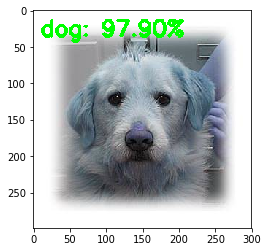

In [9]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/3.jpg')
test(image)

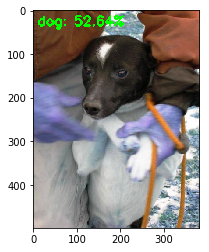

In [10]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/1.jpg')
test(image)

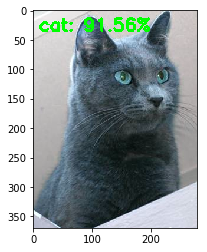

In [11]:
image = cv2.imread('/content/gdrive/My Drive/app/ASimpleNeuralNetwork/test_images/11.jpg')
test(image)